In [10]:
#california housing
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
tf.__version__

'2.3.0'

In [11]:
dataset = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ann-course/housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000,NEAR BAY
1,-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000,NEAR BAY
2,-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000,NEAR BAY
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000,NEAR BAY
4,-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000,NEAR BAY


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
dataset.isnull().sum() / len(dataset)

longitude            0.000000
latitude             0.000000
housing_median_age   0.000000
total_rooms          0.000000
total_bedrooms       0.010029
population           0.000000
households           0.000000
median_income        0.000000
median_house_value   0.000000
ocean_proximity      0.000000
dtype: float64

In [14]:
dataset.dropna(inplace=True)

dataset.isnull().sum() / len(dataset)

longitude            0.000000
latitude             0.000000
housing_median_age   0.000000
total_rooms          0.000000
total_bedrooms       0.000000
population           0.000000
households           0.000000
median_income        0.000000
median_house_value   0.000000
ocean_proximity      0.000000
dtype: float64

In [15]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
dataset.describe(include=['object'])

,ocean_proximity
count,20433
unique,5
top,<1H OCEAN
freq,9034


In [17]:
dataset.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

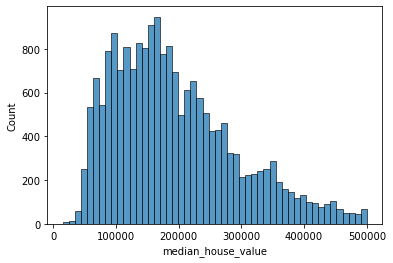

In [21]:
sns.histplot(dataset, x='median_house_value');

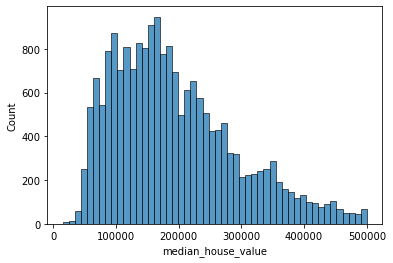

In [20]:
index_to_drop = dataset[dataset.median_house_value == 500001].index
dataset = dataset.drop(index=index_to_drop)
sns.histplot(dataset, x='median_house_value');

In [23]:
dataset_dummies = pd.get_dummies(dataset)
dataset_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000,0,0,0,1,0
1,-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000,0,0,0,1,0
2,-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000,0,0,0,1,0
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000,0,0,0,1,0
4,-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000,0,0,0,1,0


In [24]:
#podział  na zbiór testowy i treningowy
train_dataset = dataset_dummies.sample(frac=0.8, random_state=0)
test_dataset = dataset_dummies.drop(train_dataset.index)

print(f'train_dataset length: {len(train_dataset)}')
print(f'test_dataset length: {len(test_dataset)}')

train_dataset length: 15580
test_dataset length: 3895


In [26]:
train_stats = train_dataset.describe()
train_stats.pop('median_house_value')
train_stats = train_stats.transpose()

In [27]:
train_labels = train_dataset.pop('median_house_value')
test_labels = test_dataset.pop('median_house_value')

In [28]:
#standaryzacja
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [29]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [30]:
normed_train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
19234,-1.560743,1.332727,-0.838742,0.338845,-0.091639,0.000695,0.012727,1.918729,1.141765,-0.707459,-0.013877,-0.346133,-0.378230
1859,-2.283490,2.934950,-0.598855,0.034607,0.089751,-0.200934,-0.018438,-0.889913,-0.875781,-0.707459,-0.013877,-0.346133,2.643727
51,-1.351396,1.011351,1.160315,-0.342501,-0.197646,-0.327599,-0.244389,-1.380585,-0.875781,-0.707459,-0.013877,2.888874,-0.378230
11192,0.811858,-0.851700,-0.039119,-0.080165,0.035570,0.350532,0.171152,-0.416818,1.141765,-0.707459,-0.013877,-0.346133,-0.378230
20355,0.298459,-0.679368,-0.998666,-0.370283,-0.456775,-0.736029,-0.532671,-1.077075,1.141765,-0.707459,-0.013877,-0.346133,-0.378230


In [31]:
normed_test_data = normed_test_data.values
normed_train_data = normed_train_data.values

In [32]:
normed_train_data

array([[-1.560743238953,  1.332726839926, -0.838741814943, ..., -0.013877293686, -0.346133368881, -0.378229535826],
       [-2.283489512019,  2.934950272896, -0.598854942732, ..., -0.013877293686, -0.346133368881,  2.643727473489],
       [-1.351396042617,  1.01135062808 ,  1.16031545348 , ..., -0.013877293686,  2.888874361871, -0.378229535826],
       ...,
       [ 0.697215807244, -0.79580836027 , -0.279005779784, ..., -0.013877293686, -0.346133368881, -0.378229535826],
       [-1.241737987393,  0.913540476649, -0.998666396417, ..., -0.013877293686,  2.888874361871, -0.378229535826],
       [ 1.175723684584, -0.702655835098, -0.838741814943, ..., -0.013877293686, -0.346133368881, -0.378229535826]])

In [33]:
#budowa modelu
def build_model():
    model = Sequential()
    model.add(Dense(1024, kernel_regularizer='l2', activation='relu', input_shape=[len(train_dataset.keys())]))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

In [34]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              14336     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 604,929
Trainable params: 604,929
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(normed_train_data, train_labels.values, epochs=15, validation_split=0.2, verbose=1, batch_size=32)

Epoch 1/15
390/390 [==============================] - 4s 10ms/step - loss: 17503819776.0000 - mae: 96054.7188 - mse: 17503819776.0000 - val_loss: 4544940032.0000 - val_mae: 49313.8594 - val_mse: 4544940032.0000
Epoch 2/15
390/390 [==============================] - 4s 9ms/step - loss: 4164787712.0000 - mae: 46439.3359 - mse: 4164787712.0000 - val_loss: 3810790912.0000 - val_mae: 45431.8633 - val_mse: 3810790912.0000
Epoch 3/15
390/390 [==============================] - 3s 8ms/step - loss: 3770508032.0000 - mae: 44037.5703 - mse: 3770508032.0000 - val_loss: 3593819648.0000 - val_mae: 43534.3242 - val_mse: 3593819648.0000
Epoch 4/15
390/390 [==============================] - 3s 7ms/step - loss: 3631184128.0000 - mae: 43138.3203 - mse: 3631184128.0000 - val_loss: 3490479616.0000 - val_mae: 42335.6289 - val_mse: 3490479616.0000
Epoch 5/15
390/390 [==============================] - 3s 8ms/step - loss: 3560721408.0000 - mae: 42622.2070 - mse: 3560721408.0000 - val_loss: 3449661952.0000 - val_

In [37]:
test_predictions = model.predict(normed_test_data).flatten()
test_predictions

array([242773.12 , 206758.55 , 204480.2  , ...,  98835.125, 117032.71 ,  68138.305], dtype=float32)

In [38]:
pred = pd.DataFrame(test_labels)
pred['predictions'] = test_predictions
pred.head()

,median_house_value,predictions
10,281500.000000,242773.125000
13,191300.000000,206758.546875
19,162900.000000,204480.203125
26,93800.000000,187066.046875
40,155400.000000,188891.234375


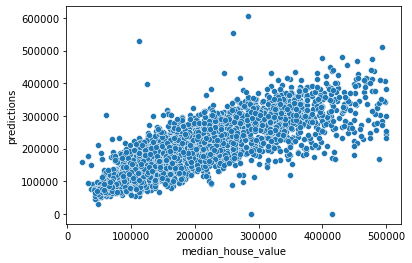

In [39]:
sns.scatterplot(data=pred, x='median_house_value', y='predictions');

In [40]:
pred['error'] = pred['median_house_value'] - pred['predictions']
pred.head()

,median_house_value,predictions,error
10,281500.000000,242773.125000,38726.875000
13,191300.000000,206758.546875,-15458.546875
19,162900.000000,204480.203125,-41580.203125
26,93800.000000,187066.046875,-93266.046875
40,155400.000000,188891.234375,-33491.234375


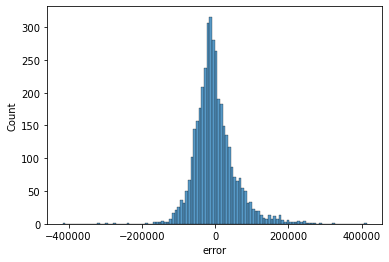

In [44]:
sns.histplot(pred, x='error');